# Using Neural Network to classify images as whole or damaged

In [21]:
import os

from keras import layers
from keras import models
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cwd = os.getcwd()
base_dir = cwd + '/data'

This dataset did not come with a test set. So I will train on training and test on validation. 

In [4]:
# directories for datsets
train_dir = os.path.join(base_dir, 'training') 
validation_dir = os.path.join(base_dir, 'validation') 

# Training whole and damaged directories
train_damage_dir = os.path.join(train_dir, '00-damage') 
train_whole_dir = os.path.join(train_dir, '01-whole') 

# whole and damaged validation directories
validation_damage_dir = os.path.join(validation_dir, '00-damage') 
validation_whole_dir = os.path.join(validation_dir, '01-whole')  

In [15]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [17]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [18]:
# Configure images for training. 
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150), batch_size=20, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [23]:
# Fit the model using batch generator and save
history = model.fit_generator(train_generator,
      steps_per_epoch=90,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)
model.save('damaged_or_whole.h5')

Epoch 1/15
92/90 [==============================] - 18s 199ms/step - loss: 0.0035 - acc: 0.9985 - val_loss: 1.1863 - val_acc: 0.7978
Epoch 2/15
92/90 [==============================] - 18s 197ms/step - loss: 0.0112 - acc: 0.9974 - val_loss: 1.2728 - val_acc: 0.7783
Epoch 3/15
92/90 [==============================] - 18s 196ms/step - loss: 1.6463e-04 - acc: 1.0000 - val_loss: 1.3841 - val_acc: 0.7891
Epoch 4/15
92/90 [==============================] - 19s 205ms/step - loss: 0.0108 - acc: 0.9974 - val_loss: 1.3825 - val_acc: 0.7630
Epoch 5/15
92/90 [==============================] - 19s 211ms/step - loss: 0.0046 - acc: 0.9985 - val_loss: 1.2953 - val_acc: 0.7891
Epoch 6/15
92/90 [==============================] - 23s 245ms/step - loss: 0.0079 - acc: 0.9980 - val_loss: 1.2379 - val_acc: 0.7891
Epoch 7/15
92/90 [==============================] - 21s 231ms/step - loss: 0.0046 - acc: 0.9990 - val_loss: 1.3878 - val_acc: 0.7804
Epoch 8/15
92/90 [==============================] - 21s 231ms/ste

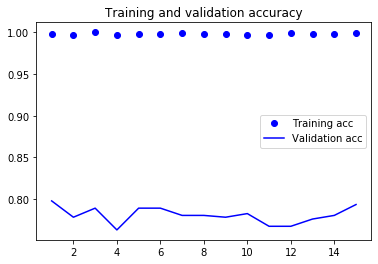

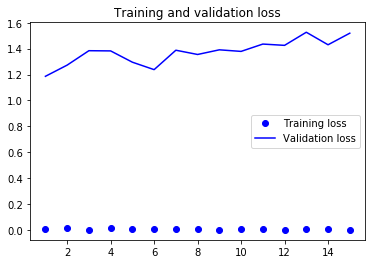

In [24]:
# Plot the results
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Data Augmentation

Data augmentation generates more training data by augmenting the samples to create new beleivable looking images. These images are generated by random transformations.

The idea is to "create" new data in order to reduce overfitting. 

In [25]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [26]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

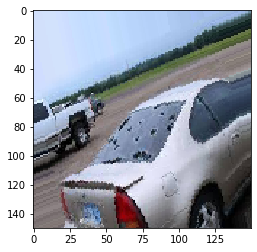

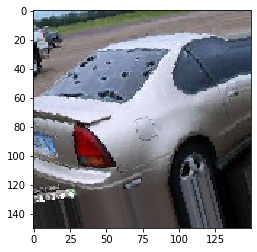

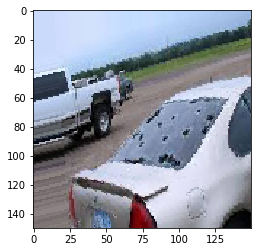

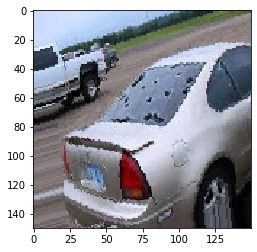

In [32]:
# Generate example images
fnames = [os.path.join(train_damage_dir, fname) for fname in os.listdir(train_damage_dir)]

img_path = fnames[100] # Choose image to augment
img = image.load_img(img_path, target_size=(150, 150)) # read and resize image
x = image.img_to_array(img) # Convert to numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshapte to (1, 150, 150, 3)

# Generates batches of randomly transformed images. 
# Loops indefinitely, so you need to break the loop at some point!
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    i += 1
    if i % 4 == 0:
        break 
plt.show()

## Dropout

In [36]:
# Build model that includes dropout
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [34]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

# Training the convnet using data-augmentation generators and save
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, 
                                                    class_mode='binary') # binary labels for binary_crossentropy

validation_generator = test_datagen.flow_from_directory(validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(train_generator,steps_per_epoch=50, epochs=30, validation_data=validation_generator, 
                              validation_steps=50)

model.save('damaged_or_whole_2.h5')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/30
58/50 [==================================] - 24s 419ms/step - loss: 0.6821 - acc: 0.5509 - val_loss: 0.6762 - val_acc: 0.5674
Epoch 2/30
58/50 [==================================] - 22s 387ms/step - loss: 0.6582 - acc: 0.6058 - val_loss: 0.6564 - val_acc: 0.6000
Epoch 3/30
58/50 [==================================] - 23s 391ms/step - loss: 0.6476 - acc: 0.6231 - val_loss: 0.6443 - val_acc: 0.6239
Epoch 4/30
58/50 [==================================] - 22s 387ms/step - loss: 0.6206 - acc: 0.6559 - val_loss: 0.6660 - val_acc: 0.6239
Epoch 5/30
58/50 [==================================] - 24s 410ms/step - loss: 0.6261 - acc: 0.6543 - val_loss: 0.6236 - val_acc: 0.6435
Epoch 6/30
58/50 [==================================] - 26s 454ms/step - loss: 0.6251 - acc: 0.6519 - val_loss: 0.6160 - val_acc: 0.6739
Epoch 7/30
58/50 [==================================] - 25s 439ms/step - loss: 0.6325 - acc: 0.

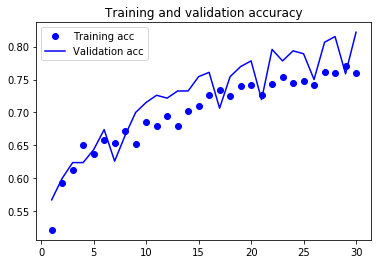

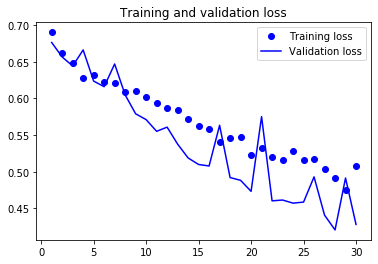

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
# This time with more epochs
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

# Training the convnet using data-augmentation generators and save
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, 
                                                    class_mode='binary') # binary labels for binary_crossentropy

validation_generator = test_datagen.flow_from_directory(validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(train_generator,steps_per_epoch=50, epochs=60, validation_data=validation_generator, 
                              validation_steps=50)

model.save('damaged_or_whole_3.h5')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/60
58/50 [==================================] - 24s 413ms/step - loss: 0.6706 - acc: 0.5792 - val_loss: 0.6661 - val_acc: 0.6022
Epoch 2/60
58/50 [==================================] - 22s 383ms/step - loss: 0.6440 - acc: 0.6321 - val_loss: 0.6495 - val_acc: 0.6217
Epoch 3/60
58/50 [==================================] - 23s 393ms/step - loss: 0.6310 - acc: 0.6226 - val_loss: 0.6251 - val_acc: 0.6587
Epoch 4/60
58/50 [==================================] - 23s 394ms/step - loss: 0.6229 - acc: 0.6717 - val_loss: 0.6278 - val_acc: 0.6435
Epoch 5/60
58/50 [==================================] - 27s 463ms/step - loss: 0.6161 - acc: 0.6746 - val_loss: 0.6298 - val_acc: 0.6565
Epoch 6/60
58/50 [==================================] - 30s 512ms/step - loss: 0.6313 - acc: 0.6609 - val_loss: 0.6040 - val_acc: 0.6826
Epoch 7/60
58/50 [==================================] - 26s 444ms/step - loss: 0.6315 - acc: 0.

Epoch 60/60
58/50 [==================================] - 30s 524ms/step - loss: 0.4343 - acc: 0.8073 - val_loss: 0.3514 - val_acc: 0.8391


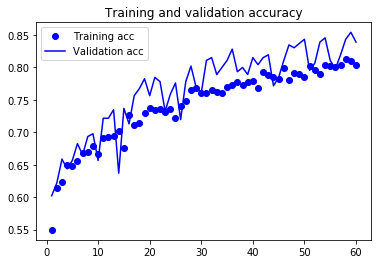

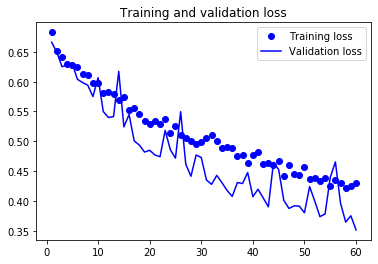

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
# This time with even more epochs
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

# Training the convnet using data-augmentation generators and save
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, 
                                                    class_mode='binary') # binary labels for binary_crossentropy

validation_generator = test_datagen.flow_from_directory(validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(train_generator,steps_per_epoch=50, epochs=120, validation_data=validation_generator, 
                              validation_steps=50)

model.save('damaged_or_whole_4.h5')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/120
58/50 [==================================] - 25s 428ms/step - loss: 0.4410 - acc: 0.8016 - val_loss: 0.3513 - val_acc: 0.8587
Epoch 2/120
58/50 [==================================] - 23s 397ms/step - loss: 0.4257 - acc: 0.7912 - val_loss: 0.3676 - val_acc: 0.8413
Epoch 3/120
58/50 [==================================] - 24s 411ms/step - loss: 0.4241 - acc: 0.8150 - val_loss: 0.4665 - val_acc: 0.7935
Epoch 4/120
58/50 [==================================] - 29s 497ms/step - loss: 0.4598 - acc: 0.7976 - val_loss: 0.3498 - val_acc: 0.8609
Epoch 5/120
58/50 [==================================] - 29s 506ms/step - loss: 0.4412 - acc: 0.7821 - val_loss: 0.3567 - val_acc: 0.8522
Epoch 6/120
58/50 [==================================] - 29s 498ms/step - loss: 0.4242 - acc: 0.8099 - val_loss: 0.4250 - val_acc: 0.8217
Epoch 7/120
58/50 [==================================] - 28s 486ms/step - loss: 0.4118 - 

58/50 [==================================] - 26s 447ms/step - loss: 0.3436 - acc: 0.8478 - val_loss: 0.5749 - val_acc: 0.7717
Epoch 60/120
58/50 [==================================] - 26s 444ms/step - loss: 0.3529 - acc: 0.8476 - val_loss: 0.5169 - val_acc: 0.7935
Epoch 61/120
58/50 [==================================] - 26s 448ms/step - loss: 0.3650 - acc: 0.8421 - val_loss: 0.3743 - val_acc: 0.8500
Epoch 62/120
58/50 [==================================] - 26s 451ms/step - loss: 0.3577 - acc: 0.8523 - val_loss: 0.3047 - val_acc: 0.8761
Epoch 63/120
58/50 [==================================] - 26s 440ms/step - loss: 0.3424 - acc: 0.8507 - val_loss: 0.2928 - val_acc: 0.8826
Epoch 64/120
58/50 [==================================] - 26s 441ms/step - loss: 0.3395 - acc: 0.8605 - val_loss: 0.3088 - val_acc: 0.8848
Epoch 65/120
58/50 [==================================] - 25s 426ms/step - loss: 0.3490 - acc: 0.8698 - val_loss: 0.2981 - val_acc: 0.8848
Epoch 66/120
58/50 [====================

Epoch 118/120
58/50 [==================================] - 24s 413ms/step - loss: 0.3521 - acc: 0.8397 - val_loss: 0.2924 - val_acc: 0.8935
Epoch 119/120
58/50 [==================================] - 25s 435ms/step - loss: 0.2966 - acc: 0.8827 - val_loss: 0.3848 - val_acc: 0.8543
Epoch 120/120
58/50 [==================================] - 26s 446ms/step - loss: 0.3101 - acc: 0.8590 - val_loss: 0.3676 - val_acc: 0.8500


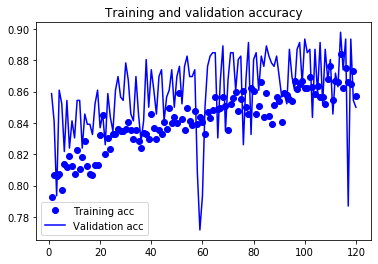

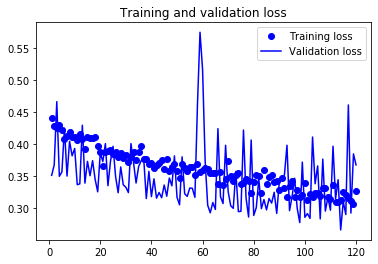

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()